<a href="https://colab.research.google.com/github/Coresight-Adithya/Automated-Projections/blob/main/Warehouse%20Club%20US/Prophet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 943 kB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641274 sha256=12627159e95fb0787d3c5052a3e2f7c5d253246197cd2554fd7603b080bf7c49
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
data_url ="https://raw.githubusercontent.com/Coresight-Adithya/Automated-Projections/main/Warehouse%20Club%20US/Warehosue%20Club.csv" 
data_name = "Warehouse US"
df = pd.read_csv(data_url)
print(df)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') + MonthEnd(1)
df.columns = ['ds', 'y']
df['y'] = df['y'].astype(float)
df = df.dropna()

           Date   Sales 
0    01-01-2010    28171
1    01-02-2010    28258
2    01-03-2010    29852
3    01-04-2010    29350
4    01-05-2010    31271
..          ...      ...
142  01-11-2021    52309
143  01-12-2021    57754
144  01-01-2022    45340
145  01-02-2022    40730
146  01-03-2022    48855

[147 rows x 2 columns]


In [4]:
# COVID Outliers
covid_outlier_st = datetime.strptime('2020-03-31', '%Y-%m-%d').date()
covid_outlier_en = datetime.strptime('2020-05-31', '%Y-%m-%d').date()

df.loc[(df['ds'].dt.date >= covid_outlier_st) & (df['ds'].dt.date <= covid_outlier_en), 'y'] = None

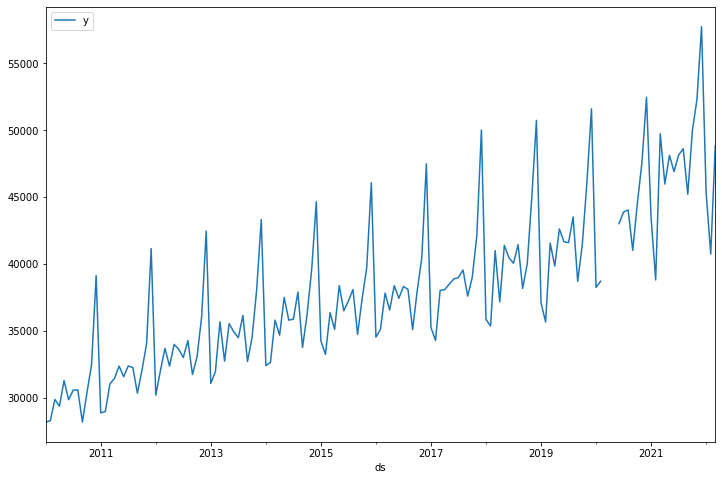

In [5]:
df.plot(x='ds', y='y', figsize=(12,8))

In [6]:
season_mode = "additive"

In [7]:
# Facebook Prophet Model
model = Prophet(seasonality_mode=season_mode, daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

In [8]:
# Make future dates
future = model.make_future_dataframe(periods=68, freq='M')
future = future[future['ds'].dt.year <= datetime.now().year+6]
future

,ds
0,2010-01-31
1,2010-02-28
2,2010-03-31
3,2010-04-30
4,2010-05-31
...,...
210,2027-07-31
211,2027-08-31
212,2027-09-30
213,2027-10-31


In [9]:
# Forecast
forecast = model.predict(future)

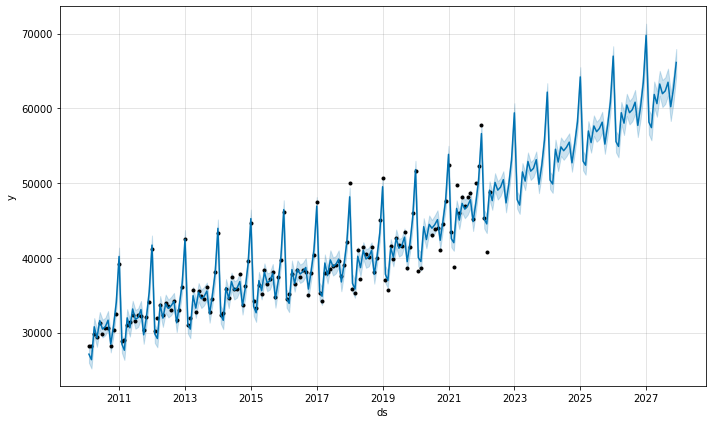

In [10]:
model.plot(forecast);

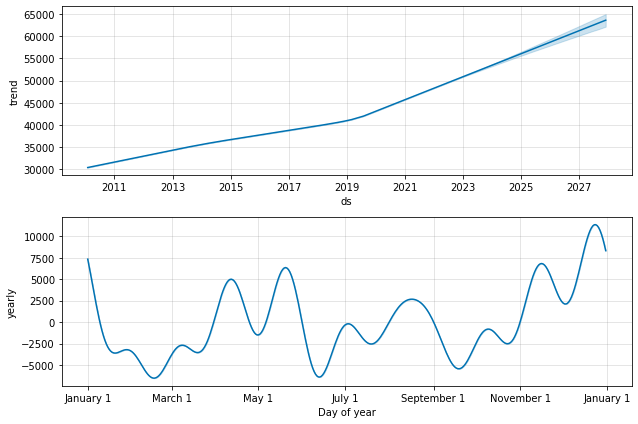

In [11]:
model.plot_components(forecast);

In [12]:

forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].to_csv(data_name+'-Prophet-Predictions.csv')